<a href="https://colab.research.google.com/github/Ancy-padmanabhan/Assignments/blob/main/Preprocessing%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# ***Make ‘PassengerId’ as the index column***




In [82]:
data.set_index('PassengerId', inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

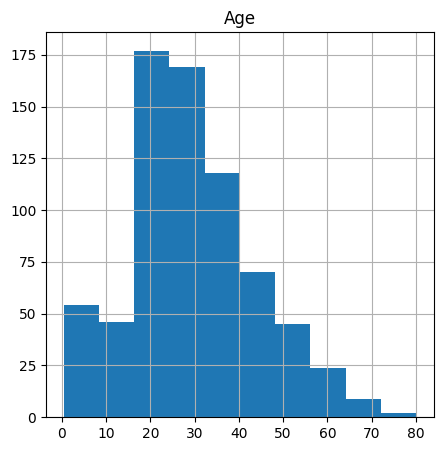

In [84]:
data.hist(column='Age',figsize=(5,5))

In [85]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [86]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x78faecf8ed10>,
 'caps': [<matplotlib.lines.Line2D at 0x78faecf8f250>,
 'boxes': [<matplotlib.lines.Line2D at 0x78faecf8ea70>],
 'medians': [<matplotlib.lines.Line2D at 0x78faecf8f790>],
 'fliers': [<matplotlib.lines.Line2D at 0x78faecf8fa30>],
 'means': []}

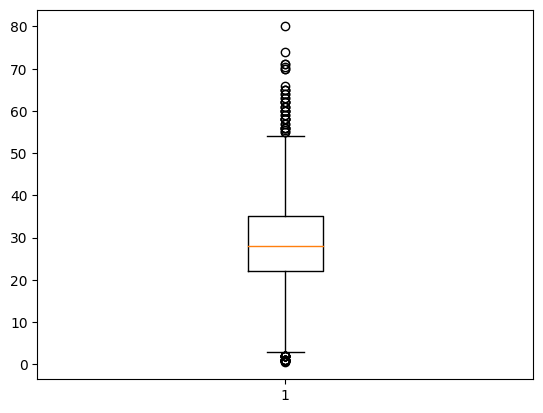

In [87]:
plt.boxplot(data['Age'])

In [88]:
Q1=np.percentile(data['Age'],25,method='midpoint')
Q2=np.percentile(data['Age'],50,method='midpoint')
Q3=np.percentile(data['Age'],75,method='midpoint')
print('Q1 is',Q1)
print('Q2 is',Q2)
print('Q3 is',Q3)

Q1 is 22.0
Q2 is 28.0
Q3 is 35.0


In [89]:
IQR=Q3-Q1
IQR

13.0

In [90]:
low_limit= Q1 - 1.5 * IQR
upp_limit= Q3 + 1.5 * IQR
print('lower limit :',low_limit)
print('Upper limit :',upp_limit)

lower limit : 2.5
Upper limit : 54.5


In [91]:
outlier=[]
for x in data['Age']:
  if((x > upp_limit) or (x < low_limit)):
    outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [96]:
# Clipping the outliers in Age Column
data['Age'] = data['Age'].clip(lower=low_limit , upper=upp_limit)

In [97]:
outlier=[]
for x in data['Age']:
  if((x > upp_limit) or (x < low_limit)):
    outlier.append(x)
outlier

[]

{'whiskers': [<matplotlib.lines.Line2D at 0x78faed28c1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x78faed28fd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x78faed28c610>],
 'medians': [<matplotlib.lines.Line2D at 0x78faecf20220>],
 'fliers': [<matplotlib.lines.Line2D at 0x78faecf202e0>],
 'means': []}

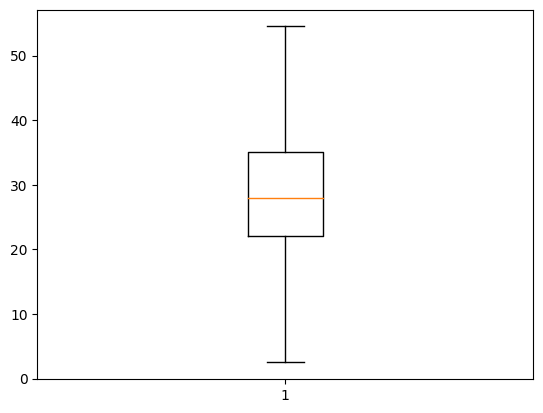

In [98]:
plt.boxplot(data['Age'])